In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/BDD-brute/liste-données.csv',encoding='latin-1', usecols=cols)

data.head()


,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3,21,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1,28,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1,30,1,100.0,1


In [ ]:
#Partie nettoyage de données

In [2]:
for c in data.columns:
    print(c + ', nombre de valeurs manquantes:', len(data[c][data[c].isnull()]))

id, nombre de valeurs manquantes: 0
host_id, nombre de valeurs manquantes: 0
zipcode, nombre de valeurs manquantes: 162
property_type, nombre de valeurs manquantes: 6
room_type, nombre de valeurs manquantes: 0
accommodates, nombre de valeurs manquantes: 0
bathrooms, nombre de valeurs manquantes: 463
bedrooms, nombre de valeurs manquantes: 140
beds, nombre de valeurs manquantes: 98
bed_type, nombre de valeurs manquantes: 0
price, nombre de valeurs manquantes: 0
minimum_nights, nombre de valeurs manquantes: 0
availability_30, nombre de valeurs manquantes: 0
number_of_reviews, nombre de valeurs manquantes: 0
review_scores_rating, nombre de valeurs manquantes: 8657
host_listing_count, nombre de valeurs manquantes: 0


In [3]:
# On retire les valeurs nulles de la base de données
doc_original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Nombre de valeurs enlevées:', doc_original - len(data))

Nombre de valeurs enlevées: 769


In [4]:
# On formate la colonne prix
data['price'] = data['price'].str.replace(r'[^-+\d.]', '').astype(float)

# On retire les valeurs qui n'ont pas trop de sens:
print('Nombre de logements à 0:', len(data[data['accommodates'] == 0]))
print('Nombre de chambres à 0:', len(data[data['bedrooms'] == 0])) 
print ('Nombre de lit à 0:', len(data[data['beds'] == 0]))
print ('Nombre dappartement dont le prix est $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

# nettoyage du code postal
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')

Nombre de logements à 0: 0
Nombre de chambres à 0: 2321
Nombre de lit à 0: 0
Nombre dappartement dont le prix est $0.00: 0


In [5]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2


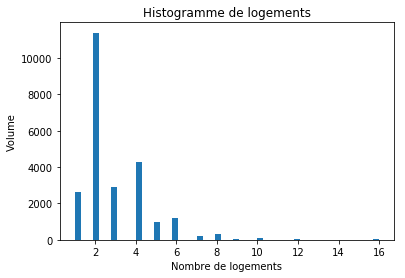

In [6]:
# visualisation de la distribution des prix
plt.hist(data['accommodates'], bins=50)
plt.title("Histogramme de logements")
plt.xlabel("Nombre de logements")
plt.ylabel("Volume")
plt.show()

In [7]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2


In [8]:
# On remplace les données "NaN" pour chacun des commentaires, c'est à dire 0 commentaires, en 'aucun commentaire'. On en aura besoin pour effectuer le random forest pas la suite
rep_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[rep_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'aucun commentaire')

# On retire les données inconsistantes en détectant les valeurs manquantes avec la isnull fonction
data = data[~data['review_scores_rating'].isnull()]

data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.0,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.0,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.0,2,11,16,96.0,2


In [9]:
# Encodage des différentes variables (code postal, type de propriété, type de pièce, type de lit, et la note):
zipcode_new = pd.get_dummies(data['zipcode'])
property_new = pd.get_dummies(data['property_type'])
room_new = pd.get_dummies(data['room_type'])
bed_new = pd.get_dummies(data['bed_type'])
bed_new = pd.get_dummies(data['bed_type'])
ratings_scores_new = pd.get_dummies(data['review_scores_rating']) 

# Puis, on les remplace les anciennes colonnes
# Axe 1 fait référence aux colonnes 
df = pd.concat((data.drop(['zipcode','property_type', 'room_type', 'bed_type','review_scores_rating'], axis=1), zipcode_new.astype(int), property_new.astype(int), room_new.astype(int), bed_new.astype(int), ratings_scores_new.astype(int)), axis=1)


# On déplace la colonne prix en dernière position
cols = list(df.columns.values)
prix = cols.index('price')
cols_rearrangee = cols[:prix] + cols[prix+1:] + [cols[prix]]
df = df[cols_rearrangee]

df.shape

(16590, 263)

In [10]:
print('Nous avons donc une base de données qui contient 16590 appartements et 263 colonnes')

Nous avons donc une base de données qui contient 16590 appartements et 263 colonnes


In [11]:
print(list(data.columns.values))
df.head()

['id', 'host_id', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'minimum_nights', 'availability_30', 'number_of_reviews', 'review_scores_rating', 'host_listing_count']


,id,host_id,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listing_count,...,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,price
0,1069266,5867023,2,1.0,1.0,1.0,3,21,62,1,...,0,0,0,0,0,0,0,0,0,160.0
2,2061725,4601412,2,1.0,1.0,2.0,3,4,35,4,...,0,0,0,0,0,0,1,0,0,58.0
3,44974,198425,2,1.0,1.0,1.0,10,1,26,1,...,0,0,0,0,1,0,0,0,0,185.0
4,4701675,22590025,2,1.0,1.0,2.0,1,30,1,1,...,0,0,0,0,0,0,0,0,1,195.0
5,68914,343302,6,1.0,2.0,3.0,2,11,16,2,...,0,0,0,0,1,0,0,0,0,165.0


In [12]:
# On convertit certaines variables, entières, en flots et on standardise les données 
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = standardize_col(df[col])
    
df.head()

,id,host_id,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listing_count,...,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,price
0,1069266,5867023,-0.550886,-0.317686,-0.407778,-0.490814,0.214606,0.337086,2.205005,-0.389514,...,0,0,0,0,0,0,0,0,0,160.0
2,2061725,4601412,-0.550886,-0.317686,-0.407778,0.347334,0.214606,-1.067590,0.937225,0.856860,...,0,0,0,0,0,0,1,0,0,58.0
3,44974,198425,-0.550886,-0.317686,-0.407778,-0.490814,3.243552,-1.315474,0.514632,-0.389514,...,0,0,0,0,1,0,0,0,0,185.0
4,4701675,22590025,-0.550886,-0.317686,-0.407778,0.347334,-0.650807,1.080739,-0.659238,-0.389514,...,0,0,0,0,0,0,0,0,1,195.0
5,68914,343302,1.654387,-0.317686,1.361785,1.185481,-0.218101,-0.489194,0.045084,0.025944,...,0,0,0,0,1,0,0,0,0,165.0


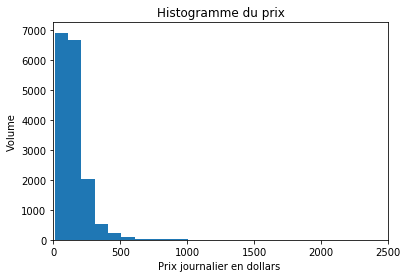

In [13]:
plt.hist(df['price'], bins=50)
plt.title("Histogramme du prix")
plt.xlabel("Prix journalier en dollars ")
plt.ylabel("Volume")
plt.xlim((0,2500))
plt.show()

In [14]:
print("La plupart des appartements en location à NY sont estimés entre 0 et 1000 dollars la journée")

La plupart des appartements en location à NY sont estimés entre 0 et 1000 dollars la journée


In [15]:
df.to_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/BDD-nette.csv', index=False)

In [ ]:
#Partie sentiment analysis avec une analyse manuelle et une analyse TextBlob

In [16]:
#nettoyages des commentaires des appartements
import pandas as pd
from textblob import TextBlob

data = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/BDD-brute/reviews.csv')
data.head(n=10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1180670,14705995,2014-06-24,10875598,Gregory,"Ok, if you like the location and don't mind an..."
1,4457617,24432844,2014-12-28,24502047,Amber,"Kleine süße WG, super gelegen, sehr freundlich..."
2,722394,9248781,2013-12-16,6821360,Giri,Extremely disappointed.
3,4074444,23983183,2014-12-15,8822691,Wendy,Exactly as described.
4,68046,11797670,2014-04-15,12231047,Virginie,"Appartement très sympa, accueillant. A quelque..."
5,68774,23987149,2014-12-15,23170531,Anthony,The reservation was canceled the day before ar...
6,920951,16985911,2014-08-05,16614692,Anthony,Very Nice and comfortable. Great location - Ma...
7,462454,13159495,2014-05-20,14129237,Amanda,Sunserae was a phenomenal host. Incredible loc...
8,2207015,13088178,2014-05-19,14336410,Laurie,Our rental was great. It was just as described...
9,1773664,11945863,2014-04-20,9979725,Eric,fantastique\ndavid simply the best !


In [17]:
# Creation de la variable reviews
reviews = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/BDD-brute/reviews.csv', delimiter=',')


print('Nombre de commentaires avant de retirer les NaNs: ', reviews.shape[0]) 
reviews = reviews.dropna(axis=0)
print('Nombre de commentaires après avoir retiré les NaNs: ', reviews.shape[0]) 

Nombre de commentaires avant de retirer les NaNs:  277659
Nombre de commentaires après avoir retiré les NaNs:  277495


In [18]:
liste = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/BDD-nette.csv', delimiter=',', encoding='latin-1')
liste_non_net = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/BDD-brute/liste-données.csv', delimiter = ',', encoding='latin-1')


y = liste['price']
# on rajoute le prix à la fin de la liste de données
del liste['price']
x = liste
              
liste = liste.join(y)

titres = []
for item in liste['id'].values:
    titres.append(liste_non_net['name'].loc[liste_non_net['id'] == item].values[-1])
    
x['name'] = titres
x['name'].head(n=5)

0          Stay like a real New Yorker! 
1    Option of 2 Beds w Private Bathroom
2    Charming Bright West Village Studio
3          Charming Apartment in Chelsea
4    Calm & Sunny Apt in Carroll Gardens
Name: name, dtype: object

In [19]:
# on créé une liste dans laquelle on enregistre les mots concaténés
vide_concat = []

# On itère à partir de chaque id de la liste
for item in x['id'].unique():
    # on regarde si l'id correspondant à un commentaire
    # si c'est le cas on concatène le nom de la liste et son commentaire
    if item in reviews['listing_id'].unique():
        vide_concat.append(str(x['name'].loc[x['id'] == item].values[-1]) + ' ' + str(reviews['comments'].loc[reviews['listing_id'] == item].values[:-1]))
    else:
        vide_concat.append(str(x['name'].loc[x['id'] == item].values[-1]))
        
mots_voisins = []

for item in liste['id'].values:
    mots_voisins.append(liste_non_net['neighbourhood_cleansed'].loc[liste_non_net['id'] == item].values[-1])

x['noms_voisins'] = mots_voisins

nbs = x['noms_voisins'].unique().tolist()
nbs = [nb.lower().split() for nb in nbs]
nbs = set([item for sublist in nbs for item in sublist])

In [20]:
import nltk
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
re.compile('<title>(.*)</title>')

stemmer = SnowballStemmer('english')
stops = set(stopwords.words("english"))

groupe = vide_concat
groupe_mots = []

# on fait en sorte que tous les mots fassent partis de l'alphabet anglais
for review in groupe:
    replaced = re.sub("[^a-zA-Z]", " ", review)
    lower_case = replaced.lower()
    words = lower_case.split()
    
    # On retire les stop-words et les mots voisins
    mots = [stemmer.stem(w) for w in words if ((not w in stops) & (not w in nbs))]
    liste_mots = ' '.join(mots)     
    groupe_mots.append(liste_mots)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/constanceleonard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
groupement = pd.DataFrame(x['id'])
groupement['groupe_mots'] = groupe_mots
groupement.to_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/groupe_mots.csv')

groupement.head(n=10)

,id,groupe_mots
0,1069266,stay like real yorker love place mention locat...
1,2061725,option bed w privat bathroom miao one best hos...
2,44974,charm bright studio great locat bus subway cit...
3,4701675,charm apart
4,68914,calm sunni apt tr bell exp rienc chez price so...
5,3005360,hip luxuri bd great apart legit bedroom comfi ...
6,2431607,bright airi room would definit recommend glori...
7,234327,girl share nice apart neighborhood perfect loc...
8,2000287,fabul fall gtwi eastern parkway vaughn made st...
9,2525956,beauti bdr heart nyc neighborhood great apart ...


In [22]:
negative = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/opinion-lexique/negative-words.txt', encoding='latin1')
positive = pd.read_csv('/Users/constanceleonard/Desktop/DAC-Airbnb/BDD-Airbnb/opinion-lexique/positive-words.txt', encoding='latin1')


#étude mannuelle
# on transforme en liste les mots positifs et les mots négatifs du fichier
pos_lib_entier = positive.iloc[:, 0].tolist()
neg_lib_entier = negative.iloc[:, 0].tolist()
new = []

#Pour chaque mot de la liste positive, on l'encode et on le rajoute à la liste de mots négatifs
for each in positive.iloc[:, 0].tolist():
    mot = each.encode('ascii', 'ignore')
    pos_lib_entier.append(mot)

#Pour chaque mot de la liste négative, on l'encore et on le rajoute à la liste de mots "new" donc en fait new contient tous les mots encodés   
for each in negative.iloc[:, 0].tolist():
    mot = each.encode('ascii', 'ignore')
    new.append(mot)

pos_lib_stems = [stemmer.stem(str(w)) for w in pos_lib_entier]
pos_lib = set(pos_lib_entier + pos_lib_stems)

neg_lib_entier = new
neg_lib_stems = [stemmer.stem(str(w)) for w in neg_lib_entier]
neg_lib = set(neg_lib_entier + neg_lib_stems)

def prediction_polarite(texte):
    polarites = []
    
    for i in range(0, len(texte)):
        opinion = texte[i].split()
        pos_compte, neg_compte = 0., 0.
        polarite = 0.5
        for mot in opinion:
            if mot in pos_lib:
                pos_compte += 1.
            elif mot in neg_lib:
                neg_compte += 1.
        
        if (pos_compte == 0.) & (neg_compte == 0.):
            pass
        else:
            polarite = pos_compte/(pos_compte + neg_compte)
        polarites.append(polarite)
        
    return polarites

total_groupe = groupement['groupe_mots'].tolist()
man_polarites = prediction_polarite(total_groupe)

In [23]:
#étude avec TextBlob

from textblob import TextBlob

tb_polarites = []

for i, each in enumerate(total_groupe):
    blob = TextBlob(each)
    tb_polarites.append(blob.sentiment.polarity)

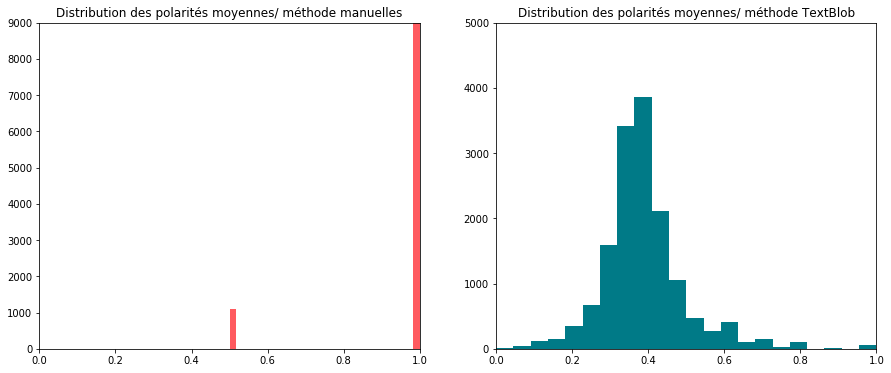

In [24]:
# On initie les graphes:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
BINS = 30

# Distribution moyenne pour la méthode manuelle
ax1.hist(man_polarites, bins = BINS, color = '#FF5A5F')
ax1.set_title('Distribution des polarités moyennes/ méthode manuelles')
ax1.set_xlim([0,1])
ax1.set_ylim([0,9000])

# Distribution moyenne pour la méthode Text Blob
ax2.hist(tb_polarites, bins = BINS, color = '#007A87')
ax2.set_title('Distribution des polarités moyennes/ méthode TextBlob')
ax2.set_xlim([0,1])
ax2.set_ylim([0,5000])

plt.show()